In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg # for check homoskedacity (inequal variances)
import seaborn as sns
import os
import scipy.stats as stats

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# TUkey's HSD pairwise comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# root_folder = "E:/data/remote_sensing/2020/"
# D:\data\remote_sensing\Potato_Fertilizer_Othello_Jun22_M10_transparenr_reflectance
root_folder = "c:/data/remote_sensing/"
project_stub = "Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance"

# export path for image files
export_path = os.path.join(root_folder, (project_stub + '/export/'))
  
# Create the directory if it doesn't already exist
try: 
    os.mkdir(export_path)
    print(f"Created: {export_path}")
except:
    print(f"Already exists: {export_path}")

    


"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

def anova_justpval(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['PR(>F)', 'omega_sq']
    aov = aov[cols]
    omega_sq = aov['omega_sq'][0]
    pval = aov['PR(>F)'][0]
    return pval, omega_sq

def check_normality(model):
    wtest, pval = stats.shapiro(model.resid)        
    return pval

def check_variance(df, group, dv):
    test = pg.homoscedasticity(df, dv=dv, group=group, method='levene', alpha=0.05)
    return str(test['equal_var'])
    
# reimport the data
df = pd.read_csv("C:/data/remote_sensing/df3.csv")

print(df.head())

Already exists: c:/data/remote_sensing/Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance/export/
   Unnamed: 0  plot_id  rep  var_num  treatment       yield  row_num  \
0           0       12    1        2          2  641.218827        0   
1           1       11    1        1          2  697.979880        0   
2           2        9    1        1          8  709.891479        0   
3           3        8    1        2          6  674.191672        0   
4           4        7    1        1          6  680.430664        0   

   range_num  NDVI_mean  SAVI_mean  ...   80_mean   81_mean   82_mean  \
0         12   0.597637   0.523898  ... -0.404235  0.635591  0.637161   
1         11   0.774351   0.675510  ... -0.541557  0.804994  0.805785   
2          9   0.714654   0.609505  ... -0.493094  0.753522  0.755214   
3          8   0.630915   0.552718  ... -0.430431  0.671740  0.673411   
4          7   0.777915   0.674019  ... -0.543892  0.810247  0.811566   

    83_mean   84_mean

In [1]:
import matplotlib; print(matplotlib.__file__)

C:\Users\magnus.wood\Anaconda3\lib\site-packages\matplotlib\__init__.py


58


Unnamed: 0  plot_id  rep  yield  row_num  range_num  \
var_num treatment                                                        
1       1                   3        3    3      3        3          3   
        2                   4        4    4      4        4          4   
        3                   4        4    4      4        4          4   
        4                   4        4    4      4        4          4   
        5                   4        4    4      4        4          4   
        6                   4        4    4      4        4          4   
        7                   3        3    3      3        3          3   
        8                   3        3    3      3        3          3   
        9                   3        3    3      3        3          3   
2       1                   3        3    3      3        3          3   
        2                   3        3    3      3        3          3   
        3                   3        3    3      3        3          3   
        4                   3        3    3      3        3          3   
        5                   3        3    3      3        3          3   
        6                   3        3    3      3        3          3   
        7                   2        2    2      2        2          2   
        8                   3        3    3      3        3          3   
        9                   3        3    3      3        3          3   

                   NDVI_mean  SAVI_mean  GCI_mean  0_mean  ...  80_mean  \
var_num treatment                                          ...            
1       1                  3          3         3       3  ...        3   
        2                  4          4         4       4  ...        4   
        3                  4          4         4       4  ...        4   
        4                  4          4         4       4  ...        4   
        5                  4          4         4       4  ...        4   
        6                  4          4         4       4  ...        4   
        7                  3          3         3       3  ...        3   
        8                  3          3         3       3  ...        3   
        9                  3          3         3       3  ...        3   
2       1                  3          3         3       3  ...        3   
        2                  3          3         3       3  ...        3   
        3                  3          3         3       3  ...        3   
        4                  3          3         3       3  ...        3   
        5                  3          3         3       3  ...        3   
        6                  3          3         3       3  ...        3   
        7                  2          2         2       2  ...        2   
        8                  3          3         3       3  ...        3   
        9                  3          3         3       3  ...        3   

                   81_mean  82_mean  83_mean  84_mean  85_mean  86_mean  \
var_num treatment                                                         
1       1                3        3        3        3        3        3   
        2                4        4        4        4        4        4   
        3                4        4        4        4        4        4   
        4                4        4        4        4        4        4   
        5                4        4        4        4        4        4   
        6                4        4        4        4        4        4   
        7                3        3        3        3        3        3   
        8                3        3        3        3        3        3   
        9                3        3        3        3        3        3   
2       1                3        3        3        3        3        3   
        2                3        3        3        3        3        3   
        3                3        3        3        3        3

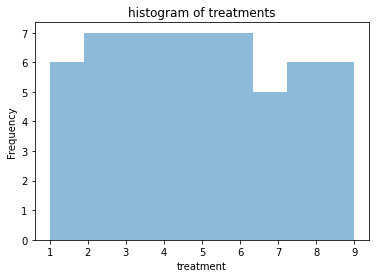

In [5]:
##### histogram of treatments and yield values

# how many of each
print(len(df["yield"]))
temp_df = df.dropna()

ax = temp_df["treatment"].plot.hist(bins=9, alpha=0.5)
plt.title('histogram of treatments', fontsize='large')
plt.xlabel("treatment")

# print(len(temp_df["yield"]))
# temp_df = temp_df[["var_num", "treatment", 'rep']]
temp_df.groupby(['var_num', 'treatment']).count()

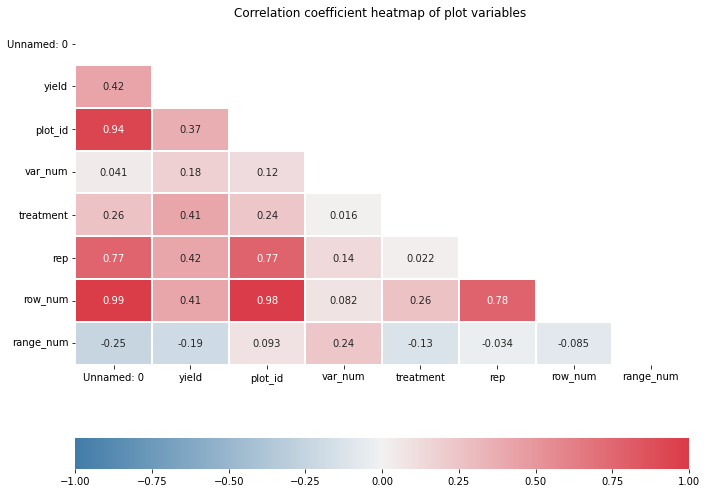

In [23]:
# plot a correlation matrix of the field spatial variables


def plot_cor_matrix(corr, mask=None, cmap=None):
    f, ax = plt.subplots(figsize=(11, 9))
    
    plt.title('Correlation coefficient heatmap of plot variables ', fontsize='large')
    
    sns.heatmap(corr, ax=ax,
                mask=mask,
                cmap=cmap,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                linewidths=2, linecolor='white', cbar_kws={'orientation': 'horizontal'})
    plt.savefig(export_path + 'yield_plotvars_heatmap.png')


# compute the correlation matrix
corr = df.corr()

#cmap
cmap = sns.diverging_palette(240, 10, center="light",as_cmap=True)

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# mask = np.invert(np.tril(p_values<0.05))

# create the plot
plot_cor_matrix(corr, mask, cmap)

# show the plot
plt.show()

# # set up the matplotlib figure
# f, ax = plt.subplots(figsize=(8,8))

# # generate a custom diverging colormap
# # cmap = sns.diverging_palette(220,20, center="dark", n=10, as_cmap=True)
# cmap = sns.diverging_palette(240, 10, center="light",as_cmap=True)

# # draw the heatmap with the mask and the correct aspect ratio
# sns.heatmap(corr,
#             cmap=cmap,
#             mask=mask,
#             vmax=1, center=0, vmin = -1,
#             square=True, linewidths=2,cbar_kws={"shrink":1},
#            annot=True)

# heatmap = sns.heatmap(corr)
# heatmap.fig.set_figwidth(12)
# heatpmap.fig.set_figheigth(12)
# Add title and axis names


# # generate a custom diverging colormap
# # cmap = sns.diverging_palette(220,20, center="dark", n=10, as_cmap=True)
# cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# # draw the heatmap with the mask and the correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=2,cbar_kws={"shrink":.5})

# heatmap = sns.heatmap(corr)
# heatmap.fig.set_figwidth(12)
# heatpmap.fig.set_figheigth(12)



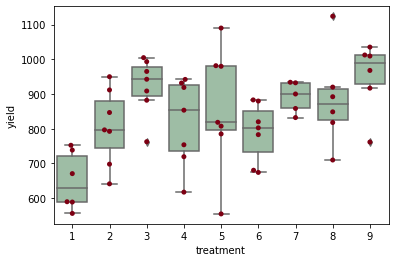

In [6]:
#### box plot of treatment vs yield ####

# # reshape the d dataframe suitable for statsmodels package 
# df_melt = pd.melt(df3.reset_index(), id_vars=['plot_id'], value_vars=['treatment', 'yield'])
# # replace column names
# df_melt.columns = ['plot_id', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

ax = sns.boxplot(x='treatment', y='yield', data=df, color='#99c2a2')
ax = sns.swarmplot(x="treatment", y="yield", data=df, color='#7d0013')
plt.show()


In [91]:
# # Ordinary Least Squares (OLS) model
model = ols("df['yield'] ~ df['treatment']", data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=2)


check_normality(model)

print(f"assumption of equal variances:{check_variance(df, group='treatment', dv='yield')}")
    



anova_table(aov_table)


Assumption of normality is not violated, p-val:0.6993059515953064
assumption of equal variances:levene    True
Name: equal_var, dtype: bool


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
df['treatment'],169615.715329,1.0,169615.715329,11.119544,0.00152,0.165668,0.148556
Residual,854214.907765,56.0,15253.837639,NaN,NaN,NaN,NaN


In [54]:




#### ANOVA one-way #######
# stats f_oneway functions msakes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['var_num'], df['yield'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05













IndentationError: unexpected indent (Temp/ipykernel_9228/736941061.py, line 10)

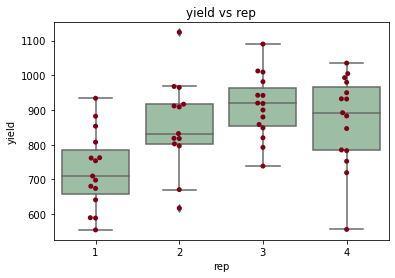

In [94]:
ax = sns.boxplot(x='rep', y='yield', data=df, color='#99c2a2')
ax = sns.swarmplot(x="rep", y="yield", data=df, color='#7d0013')
plt.title("yield vs rep")
plt.show()

2272.736599036836 3.905672135305342e-77
Assumption of normality is not violated, p-val:0.5180676579475403
assumption of equal variances:levene    True
Name: equal_var, dtype: bool


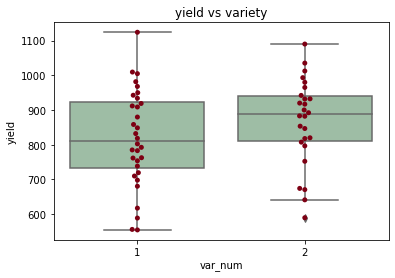

omega-squared rules of thumb
magnitude of effect: low 0.01, medium 0.06, high 0.14


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
df['var_num'],33882.993409,1.0,33882.993409,1.916715,0.171711,0.033094,0.01556
Residual,989947.629685,56.0,17677.636244,NaN,NaN,NaN,NaN


In [107]:
#### ANOVA yield and variety 

fvalue, pvalue = stats.f_oneway(df['var_num'], df['yield'])
print(fvalue, pvalue)

# # Ordinary Least Squares (OLS) model
model = ols("df['yield'] ~ df['var_num']", data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=2)

check_normality(model)

print(f"assumption of equal variances:{check_variance(df, group='var_num', dv='yield')}")
    
ax = sns.boxplot(x='var_num', y='yield', data=df, color='#99c2a2')
ax = sns.swarmplot(x="var_num", y="yield", data=df, color='#7d0013')
plt.title("yield vs variety")
plt.show()

print("omega-squared rules of thumb\nmagnitude of effect: low 0.01, medium 0.06, high 0.14")
    
anova_table(aov_table)

2020.2194492994179 2.2971737226541025e-74
Assumption of normality is not violated, p-val:0.9797224402427673
assumption of equal variances:levene    False
Name: equal_var, dtype: bool


C:\Users\magnus.wood\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


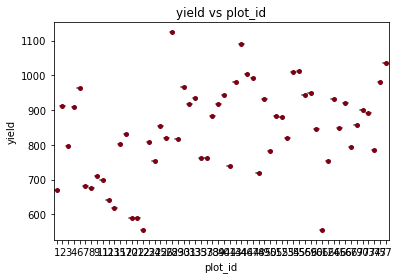

omega-squared rules of thumb
magnitude of effect: low 0.01, medium 0.06, high 0.14


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
df['plot_id'],143837.405497,1.0,143837.405497,9.15336,0.003745,0.140489,0.123249
Residual,879993.217597,56.0,15714.164600,NaN,NaN,NaN,NaN


In [108]:
#### ANOVA yield and plot_id 

fvalue, pvalue = stats.f_oneway(df['plot_id'], df['yield'])
print(fvalue, pvalue)

# # Ordinary Least Squares (OLS) model
model = ols("df['yield'] ~ df['plot_id']", data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=2)

check_normality(model)

print(f"assumption of equal variances:{check_variance(df, group='plot_id', dv='yield')}")
    
ax = sns.boxplot(x='plot_id', y='yield', data=df, color='#99c2a2')
ax = sns.swarmplot(x="plot_id", y="yield", data=df, color='#7d0013')
plt.title("yield vs plot_id")
plt.show()

print("omega-squared rules of thumb\nmagnitude of effect: low 0.01, medium 0.06, high 0.14")
    
anova_table(aov_table)

2245.575454407685 7.50143662372792e-77
Assumption of normality is not violated, p-val:0.2705126702785492
assumption of equal variances:levene    True
Name: equal_var, dtype: bool


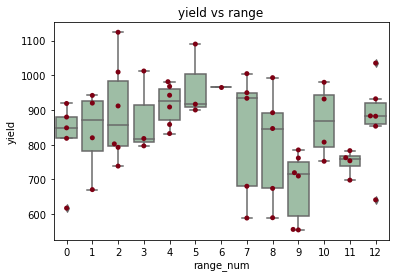

omega-squared rules of thumb
magnitude of effect: low 0.01, medium 0.06, high 0.14


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
df['range_num'],37687.547329,1.0,37687.547329,2.140159,0.149077,0.03681,0.019279
Residual,986143.075765,56.0,17609.697782,NaN,NaN,NaN,NaN


In [123]:
#### ANOVA yield and range 

fvalue, pvalue = stats.f_oneway(df['yield'], df['range_num'])
print(fvalue, pvalue)

# # Ordinary Least Squares (OLS) model
model = ols("df['yield'] ~ df['range_num']", data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=2)

check_normality(model)

print(f"assumption of equal variances:{check_variance(df, group='range_num', dv='yield')}")
    
ax = sns.boxplot(x='range_num', y='yield', data=df, color='#99c2a2')
ax = sns.swarmplot(x="range_num", y="yield", data=df, color='#7d0013')
plt.title("yield vs range")
plt.show()

print("omega-squared rules of thumb\nmagnitude of effect: low 0.01, medium 0.06, high 0.14")
    
anova_table(aov_table)

# pval, omega_sq = anova_justpval(aov_table)
# print(f"pval: {pval}, omega_sq: {omega_sq}")

2245.575454407685 7.50143662372792e-77
Assumption of normality is not violated, p-val:0.2705126702785492
assumption of equal variances:levene    True
Name: equal_var, dtype: bool


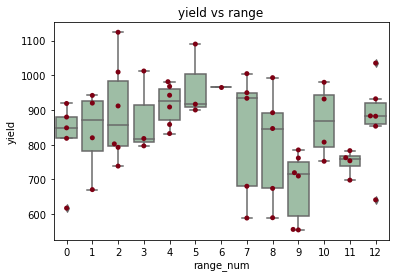

omega-squared rules of thumb
magnitude of effect: low 0.01, medium 0.06, high 0.14


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
df['range_num'],37687.547329,1.0,37687.547329,2.140159,0.149077,0.03681,0.019279
Residual,986143.075765,56.0,17609.697782,NaN,NaN,NaN,NaN


In [124]:
#### ANOVA yield and range 

fvalue, pvalue = stats.f_oneway(df['yield'], df['range_num'])
print(fvalue, pvalue)

# # Ordinary Least Squares (OLS) model
model = ols("df['yield'] ~ df['range_num']", data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=2)

check_normality(model)

print(f"assumption of equal variances:{check_variance(df, group='range_num', dv='yield')}")
    
ax = sns.boxplot(x='range_num', y='yield', data=df, color='#99c2a2')
ax = sns.swarmplot(x="range_num", y="yield", data=df, color='#7d0013')
plt.title("yield vs range")
plt.show()

print("omega-squared rules of thumb\nmagnitude of effect: low 0.01, medium 0.06, high 0.14")
    
anova_table(aov_table)

# pval, omega_sq = anova_justpval(aov_table)
# print(f"pval: {pval}, omega_sq: {omega_sq}")

Null hypothesis rejected. pvalue: 4.511904771730252e-77, sample means do not have the same population mean


normality test, p-val: 0.9820313453674316, homoskedacity:levene    True
Name: equal_var, dtype: bool

omega-squared rules of thumb
magnitude of effect: low 0.01, medium 0.06, high 0.14

ordinary least squares linear regression model: 
pval: 0.0014258180463398366, omega_sq: 0.15033647376708328


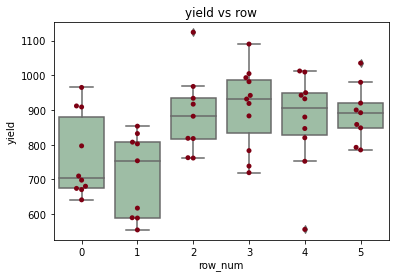

In [141]:
#### ANOVA yield and range 

fvalue, pvalue = stats.f_oneway(df['yield'], df['row_num'])
if pvalue < 0.05:
    print(f"Null hypothesis rejected. pvalue: {pvalue}, sample means do not have the same population mean")
else:
    print(f"Null hypothesis not rejected, pvalue: {pvalue}, sample means do not have the same population mean")
print("\n")
    
# # Ordinary Least Squares (OLS) model
model = ols("df['yield'] ~ df['row_num']", data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=2)

# check normality and variance
print(f"normality test, p-val: {check_normality(model)}, homoskedacity:{check_variance(df, group='row_num', dv='yield')}")
    


print("\nomega-squared rules of thumb\nmagnitude of effect: low 0.01, medium 0.06, high 0.14\n")
    
# anova_table(aov_table)

pval, omega_sq = anova_justpval(aov_table)
print(f"ordinary least squares linear regression model: \npval: {pval}, omega_sq: {omega_sq}")

ax = sns.boxplot(x='row_num', y='yield', data=df, color='#99c2a2')
ax = sns.swarmplot(x="row_num", y="yield", data=df, color='#7d0013')
plt.title("yield vs row")
plt.show()

In [142]:
aov = pg.anova(dv='yield', between=['treatment', 'var_num'], data=df,
             detailed=True)

print(aov)



                Source             SS    DF            MS         F     p-unc  \
0            treatment  399857.534465   8.0  49982.191808  3.956768  0.001586   
1              var_num   36302.393182   1.0  36302.393182  2.873826  0.097803   
2  treatment * var_num   84807.037717   8.0  10600.879715  0.839203  0.574086   
3             Residual  505283.057503  40.0  12632.076438       NaN       NaN   

        np2  
0  0.441763  
1  0.067030  
2  0.143719  
3       NaN  


In [163]:
# # Ordinary Least Squares (OLS) model
model = ols("df['yield'] ~ df['var_num'] + df['treatment'] + df['treatment'] * df['var_num']", data=df).fit()

# summary of the model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            df['yield']   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     4.468
Date:                Mon, 13 Sep 2021   Prob (F-statistic):            0.00711
Time:                        10:07:13   Log-Likelihood:                -359.45
No. Observations:                  58   AIC:                             726.9
Df Residuals:                      54   BIC:                             735.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       705.6162    109.160      6.464      0.000     486.764     924.469
df['var_num']                    21.8323     70.621      0.309      0.758    -119.753     163.418
df['treatment']                  13.6884     19.980      0.685      0.496     -26.369      53.746
df['treatment']:df['var_num']     5.1341     12.829      0.400      0.691     -20.587      30.855
==============================================================================
Omnibus:                        0.806   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.797
Skew:                          -0.015   Prob(JB):                        0.671
Kurtosis:                       2.427   Cond. No.                         81.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
# use the model to perform a two-way ANOVA
aov_table = sm.stats.anova_lm(model, typ=2)

# check normality and variance
print(f"normality test, p-val: {check_normality(model)}, homoskedacity:{check_variance(df, group='row_num', dv='yield')}")
print("\nomega-squared rules of thumb\nmagnitude of effect: low 0.01, medium 0.06, high 0.14\n")
    
# anova_table(aov_table)
print("\nanova_table func")
print(anova_table(aov_table))

# pval, omega_sq = anova_justpval(aov_table)
# print(f"ordinary least squares linear regression model: \npval: {pval}, omega_sq: {omega_sq}")

df4 = df
df4['plot_id'].astype("category")

aov = pg.anova(dv='yield', between=['treatment', 'var_num'], data=df4,
             detailed=True)
print("\n\nusing the pengouin method of anova")
print(aov)

print('Omega-squared, also called Hays omega-squared or the "coefficient of determination", is the proportion of variance in the dependent variable accounted for by the independent variable, adjusted for bias [unlike eta-squared] and interpreted analogously to adjusted R-square. Adjusted effect size attempts to correct bias which may arise from small sample size, having a large number of variables,  and/or estimating a small population effect size.” from: http://faculty.chass.ncsu.edu/garson/PA765/anova.htm")')

normality test, p-val: 0.7240098118782043, homoskedacity:levene    True
Name: equal_var, dtype: bool

omega-squared rules of thumb
magnitude of effect: low 0.01, medium 0.06, high 0.14


anova_table func
                                      sum_sq    df        mean_sq          F  \
df['var_num']                   31564.334837   1.0   31564.334837   2.078075   
df['treatment']                167297.056757   1.0  167297.056757  11.014195   
df['treatment']:df['var_num']    2432.587840   1.0    2432.587840   0.160152   
Residual                       820217.985087  54.0   15189.221946        NaN   

                                 PR(>F)    eta_sq  omega_sq  
df['var_num']                  0.155203  0.030900  0.015795  
df['treatment']                0.001624  0.163774  0.146723  
df['treatment']:df['var_num']  0.690595  0.002381 -0.012305  
Residual                            NaN       NaN       NaN  


using the pengouin method of anova
                Source             SS    DF     

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2 131.6177 0.0223   14.2042 249.0312   True
     1      3 184.2512  0.001   71.1088 297.3937   True
     1      4 143.5747 0.0075   30.4322 256.7172   True
     2      3  52.6335 0.6216    -64.78  170.047  False
     2      4   11.957    0.9 -105.4565 129.3705  False
     3      4 -40.6766  0.752 -153.8191  72.4659  False
-------------------------------------------------------


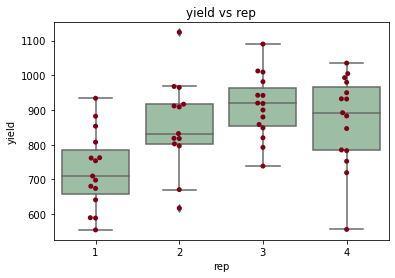

In [168]:

# tukeys HSD for treatment
tukey = pairwise_tukeyhsd(endog=df['yield'],
                          groups=df['rep'],
                          alpha=0.05)

#display results
print(tukey)


ax = sns.boxplot(x='rep', y='yield', data=df, color='#99c2a2')
ax = sns.swarmplot(x="rep", y="yield", data=df, color='#7d0013')
plt.title("yield vs rep")
plt.show()

In [165]:
# # Ordinary Least Squares (OLS) model
model = ols("df['yield'] ~ df['var_num'] + df['treatment'] + df['plot_id'] + df['treatment'] * df['var_num']", data=df).fit()

# summary of the model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            df['yield']   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4.834
Date:                Mon, 13 Sep 2021   Prob (F-statistic):            0.00213
Time:                        10:10:08   Log-Likelihood:                -356.86
No. Observations:                  58   AIC:                             723.7
Df Residuals:                      53   BIC:                             734.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       618.3910    112.427      5.500      0.000     392.890     843.892
df['var_num']                    48.2480     69.196      0.697      0.489     -90.542     187.038
df['treatment']                  20.8583     19.554      1.067      0.291     -18.362      60.079
df['plot_id']                     1.6933      0.761      2.225      0.030       0.167       3.220
df['treatment']:df['var_num']    -2.1211     12.806     -0.166      0.869     -27.807      23.564
==============================================================================
Omnibus:                        0.829   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.928
Skew:                           0.222   Prob(JB):                        0.629
Kurtosis:                       2.568   Cond. No.                         382.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""